In [1]:
import numpy as np
import pandas as pd

import data

In [120]:
# PREPROCESSING

# merge all food dataframes into one
full_food = pd.concat([pd.DataFrame(x) for x in data.food.values()], axis=1)
full_food = full_food.loc[:,~full_food.columns.duplicated()]

# combine food and education dataframes, removing state and county from education
education = pd.DataFrame(data.education).drop(['State', 'Area name'], axis=1)
full_df = full_food.merge(education, left_index=True, right_index=True)

# convert numbers that are actually strings with commas (e.g. "100,000") into actual integers
for col in ['2010 Census Population', 'Population Estimate, 2011', 'Population Estimate, 2012', 'Population Estimate, 2013',
                'Population Estimate, 2014', 'Population Estimate, 2015', 'Population Estimate, 2016']:
    full_df[col] = [int(x.replace(',', '')) for x in full_df[col].tolist()]

# normalize any column that isn't already boolean
bool_cols = [col for col in full_df 
                    if np.isin(full_df[col].dropna().unique(), [0, 1]).all()]
for col in full_df.columns:
    if (col in bool_cols) or (col in ['State', 'County']):
        continue
    full_df[col] = (full_df[col]-full_df[col].min())/(full_df[col].max()-full_df[col].min())

full_df = full_df.drop('County', axis=1)

# one-hot encoding for state
one_hot = pd.get_dummies(full_df['State'])
full_df = full_df.drop('State', axis=1)
full_df = full_df.join(one_hot)

# aggressively just drop any column that has any NaN values in it
full_df = full_df.dropna(axis=1)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import r2_score
from random import sample

# split into 80 / 20 training / testing
train_idx = sample(range(len(y)), int(0.8*len(y)))
train_X = [X[i] for i in train_idx]
train_y = [y[i] for i in train_idx]
test_X = [X[i] for i in range(len(X)) if i not in train_idx]
test_y = [y[i] for i in range(len(X)) if i not in train_idx]

gbr = GradientBoostingRegressor()
gbr.fit(train_X, train_y)
gbr_pred_y = gbr.predict(test_X)
gbr_score = r2_score(test_y, gbr_pred_y)

abr = AdaBoostRegressor()
abr.fit(train_X, train_y)
abr_pred_y = abr.predict(test_X)
abr_score = r2_score(test_y, abr_pred_y)

rfr = RandomForestRegressor()
rfr.fit(train_X, train_y)
rfr_pred_y = gbr.predict(test_X)
rfr_score = r2_score(test_y, rfr_pred_y)

print(gbr_score, abr_score, rfr_score)

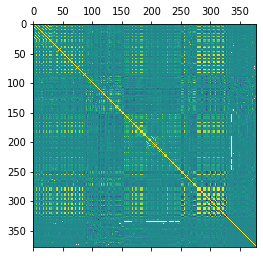

0.4080553102299273
0.08112396110203497
0.29202918977510833
-0.10749457954286001
0.3256102444240014
-0.32664279412015207
0.39394229680989423
0.08062839268837498
0.39043833280437523
0.0034810478721178373
0.27246969474783994
0.2615470695039118
-0.04601279254967211
-0.007564709028785773
0.34421028914195817
0.3514603112525136
-0.0008751368715168498
-0.02415293088908396
0.3366755739390896
0.33306736096970346
-0.25844836833007
-0.26571892968622224
0.3048747223911427
0.3151084003163266
0.25487563801080804
0.2660761562828465
0.26697720937249014
-0.40391027210281216
0.22943209030301173
0.23034234997537115
-0.17866175273928636
-0.1666300391672126
0.33811873053103225
0.3389635345615686
0.33571684133270324
0.33931914431690047
0.3665045808764061
0.3664114369531254
0.3053542213476452
0.31872385614145793
-0.06290720217026717
-0.21787216362456352
0.22102636778649165
0.26110139976794683
-0.2681601368879423
-0.22862575571365618
0.16316199164585504
-0.11833145486010344
-0.027596755715070864
0.036267268936

C:\Users\Nick\Anaconda3\envs\CSCI5622\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nick\Anaconda3\envs\CSCI5622\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [118]:
import matplotlib.pyplot as plt

# visualize correlation between predictors
plt.matshow(full_df.corr())
plt.show()

# list correlation between each predictor and the outcome
for i, column in enumerate(X.T):
    print(np.corrcoef(column, y)[0, 1])